In [84]:
# Import Libraries
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [85]:
# 1. Load and Explore Dataset
# ==============================
df = pd.read_csv("Mall_Customers.csv")

In [86]:
# Display first 5 rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
# Display the data types and non-null counts of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [88]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [89]:
# Summary statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [90]:
# 2. Data Preprocessing
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


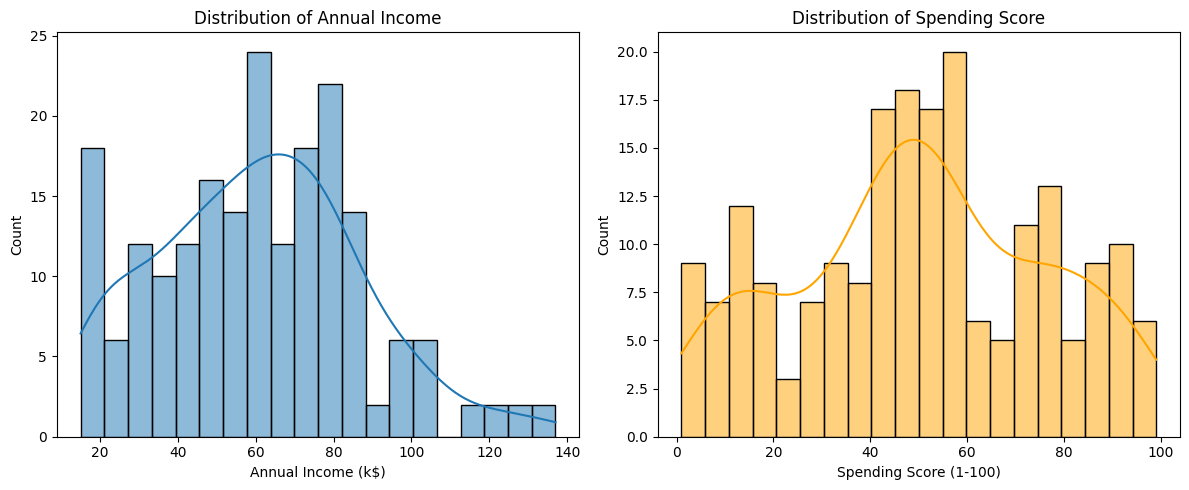

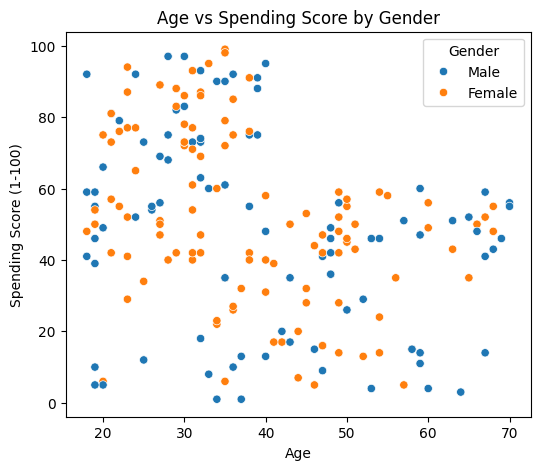

In [91]:
#plot the distribution of Age, Annual Income, and Spending Score
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20)
plt.title("Distribution of Annual Income")

plt.subplot(1,2,2)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color="orange")
plt.title("Distribution of Spending Score")

plt.tight_layout()
plt.show()

# Scatter plot: Age vs Spending Score
plt.figure(figsize=(6,5))
sns.scatterplot(x="Age", y="Spending Score (1-100)", hue="Gender", data=df)
plt.title("Age vs Spending Score by Gender")
plt.show()

In [92]:
# feature engineering
df_encoded = df.copy()
df_encoded['Gender'] = LabelEncoder().fit_transform(df_encoded['Gender'])
df_encoded.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [93]:
# Features for clustering
X = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [94]:
# Standardize features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

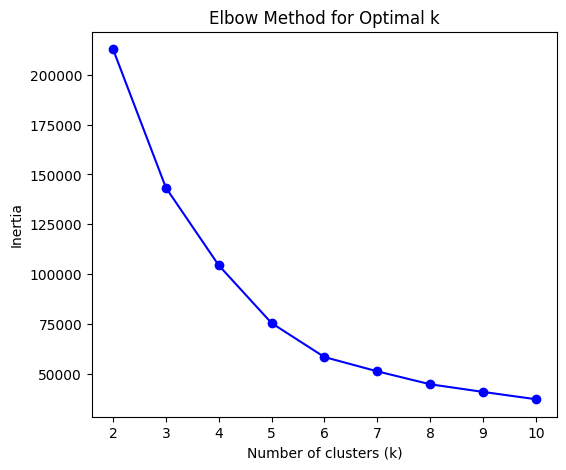

In [95]:
# 4. Elbow Method to Find Optimal k
# ==============================
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [96]:
# 5. Apply K-Means Clustering
# ==============================
optimal_k = 5  # (Choose from Elbow Method result)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_encoded['Cluster'] = kmeans.fit_predict(X)

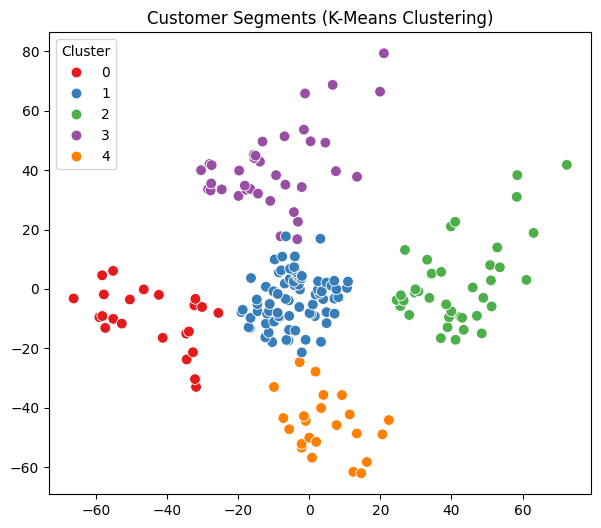

In [97]:
# 6. Visualize Clusters (PCA for 2D View)
# ==============================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_encoded['Cluster'], palette="Set1", s=60)
plt.title("Customer Segments (K-Means Clustering)")
plt.show()


In [98]:
# 7. Evaluate with Silhouette Score
# ==============================
score = silhouette_score(X, df_encoded['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {score:.3f}")

Silhouette Score for k=5: 0.444


In [99]:
# 8. Save Updated Dataset
# ==============================
df_encoded.to_csv("Mall_Customers_with_clusters.csv", index=False)
print("Clustered dataset saved as 'Mall_Customers_with_clusters.csv'")

Clustered dataset saved as 'Mall_Customers_with_clusters.csv'
